# Cas Kaggle ApC

## Participants

Martí Armengod Villar, 1673911 

Joan Marc Samó Rojas, 1679937 

## Base de dades 
La nostra Base de dades que tracta sobre de dades de partides de escacs aqui tenim el enllaç a la web de Kaggle

https://www.kaggle.com/datasets/datasnaek/chess

Hem escollit aquesta base de dades per que hem vist que predint quin jugador guayara ens ajuda a entendre quin tipus de jugades son mes probables que ens donin la victoria o com d'important es la experencia del jugador o altra informació ue podem extreure.

## Objectius

El que volem ser capaços es predir quin jugador guanyara a partir de la seva llençada inicial.

## Pasos a seguir
0. Feina previa
  * Importar dades
1. EDA (exploratory data analysis):
  * Atributs
    - Descripció dels atributs:
    - Informació sobre el nostre 'target'
  * Correlació
  * Balancejades
2. Preprocessing:
  * Detecció de Nans
  * Eliminar Duplicats
  * Normalització de les dades

3. Metric selection:

4. Model Selection amb Crossvalidation:

5. Analisi final


### 0. Feina previa

#### Importar dades
Ara el que farem es importar les nostres dades i fer la separació entre el train i el test per evitar data leakage

In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.svm import SVC
import time

# Importar dades del CSV i separar 
dades = pd.read_csv('games.csv')

train_set, test_set = train_test_split(dades,random_state=42,test_size=0.2)
X_test = test_set
X_test

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
19390,ECQZchLt,True,1.504113e+12,1.504113e+12,61,resign,white,10+0,erdugliano71,1919,selami011235,1798,d4 f5 Bf4 Nf6 e3 d6 Nc3 Nc6 Bc4 e5 dxe5 dxe5 Q...,A80,Dutch Defense,2
4226,BqMaxwMW,True,1.454940e+12,1.454940e+12,86,mate,black,10+0,djbaseball46,1195,carlosamadorsanchez,1123,e4 e5 Nf3 f5 d3 fxe4 dxe4 Bb4+ Bd2 Bxd2+ Nbxd2...,C40,Latvian Gambit,4
18893,cIP5THAR,True,1.466630e+12,1.466631e+12,27,resign,black,10+2,nitche,1867,jaivl,1932,e4 c5 Nf3 g6 d4 cxd4 Nxd4 Nc6 Nxc6 bxc6 Nc3 Bg...,B34,Sicilian Defense: Accelerated Dragon | Exchan...,9
15231,F4BG9EjO,True,1.503159e+12,1.503160e+12,79,resign,white,10+0,yellow_dragon,1823,silentmove,1770,d4 Nf6 c4 g6 Nc3 Bg7 e4 d6 f3 O-O Be3 e5 d5 c6...,E88,King's Indian Defense: Saemisch Variation | C...,14
13987,lG5mJCIw,True,1.504180e+12,1.504181e+12,37,resign,white,10+0,rhysmc123,1371,gonzorg,1193,e4 e5 d3 Nf6 Bg5 Nc6 Bxf6 gxf6 a3 Qe7 b4 d6 c4...,C20,King's Pawn Game: Leonardis Variation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12136,yib185CP,True,1.497006e+12,1.497006e+12,59,resign,white,10+0,cothraige,1844,noobdude,1589,d4 d5 c4 c6 Nc3 Nf6 cxd5 Nxd5 Nxd5 Qxd5 e3 e5 ...,D10,Slav Defense #2,5
13103,MquSInPb,True,1.502463e+12,1.502463e+12,8,mate,black,10+0,samilou123,1605,ppm,1735,e4 e5 h3 Bc5 a3 Qf6 Ne2 Bxf2#,C20,King's Pawn Game,2
10564,hvFyJb0x,True,1.396441e+12,1.396441e+12,35,mate,white,10+10,vladimir-kramnik-1,1610,thiago5555,1500,e4 e5 Nf3 Nf6 Nxe5 Nxe4 Qe2 Nd6 Nc6+ Be7 Nxd8 ...,C42,Russian Game: Damiano Variation,6
4104,ZUOFdaon,True,1.475420e+12,1.475420e+12,53,mate,white,15+10,om1665061,1184,sofaki23,1269,e4 e5 Nf3 Nc6 Nc3 Nf6 Bc4 Bb4 O-O Bxc3 d3 Ba5 ...,C46,Four Knights Game: Italian Variation,7


In [3]:
#Funcions Generiques que utilitzarem mes endavant 

#Funció per eliminar atributs

def eliminar_atributs(df, columnes_a_eliminar):
    df_sense_atributs = df.drop(columns=columnes_a_eliminar, axis=1)
    return df_sense_atributs

#

### 1. EDA (exploratory data analysis):

Una vegada em tingut el data set a les nostres mans hem estat analitzant quines caracteristiques i atributs tenim per poder veure quin son mes utils i necesaris i quins no.

#### Atributs
La nostre base de dades te 16 atributs (columnes)

Són dels tipus següents:
- **Binaris:** Rated
- **Categòric:** Id, Created_at, Last_move_at, Victory_status, Winner, Increment_code, White_id, Black_id, Moves, Opening_eco, Opening_name
- **Numèrics:** Turns, White_rating, Black_rating, Opening_ply

##### Descripció dels atributs:
- **Id:** Identificador de la partida.
- **Rated:** Qualificació de la partida.
- **Created_at:** Hora de començament.
- **Last_move_at:** Hora de fi.
- **Turns:** Numero de torns que ha durat la partida.
- **Victory_status:** Com ha quedat l'estat de la partida (mate,resign,draw).
- **Winner:** Color guanyador (Será el nostre target).
- **Increment_code:** Temps maxim de la partida.
- **White_id:** Identificador del jugador que fara servir les fitxes blanques.
- **White_rating:** Puntuació que té el jugador que utilitza les blanques.
- **Black_id:** Identificador del jugador que fara servir les fitxes negres.
- **Black_rating:** Puntuació que té el jugador que utilitza les negres.
- **Moves:** Movimnets que es relalitzen durant la partida.
- **Opening_eco:** Primer moviment d'obertura.
- **Opening_name:** Nom de la jugada inicial.
- **Opening_ply:** Numero de moviments per realitzar l'obertura.

##### Informació sobre el nostre 'target'

És l'atribut Winner que es del tipus Categoric ja que tenim tres possibles opcions, que serien White, Black o Draw (Empat).

També hem de comentar que la nostra base de dades no conté nans.


In [4]:
tipus_atributs = train_set.info()
print(tipus_atributs)


<class 'pandas.core.frame.DataFrame'>
Index: 16046 entries, 10387 to 15795
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              16046 non-null  object 
 1   rated           16046 non-null  bool   
 2   created_at      16046 non-null  float64
 3   last_move_at    16046 non-null  float64
 4   turns           16046 non-null  int64  
 5   victory_status  16046 non-null  object 
 6   winner          16046 non-null  object 
 7   increment_code  16046 non-null  object 
 8   white_id        16046 non-null  object 
 9   white_rating    16046 non-null  int64  
 10  black_id        16046 non-null  object 
 11  black_rating    16046 non-null  int64  
 12  moves           16046 non-null  object 
 13  opening_eco     16046 non-null  object 
 14  opening_name    16046 non-null  object 
 15  opening_ply     16046 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.0+ MB
None


#### Correlació
Hem pogut observat que tenim alguna correlació entre atributs,

- Els atributs de opening_eco, opening_name i opening_ply estan molt relacionats, ja que depenen del tipus de moviment inicial que realitzi sera un nom de obertura amb uns moviments definits. La correlació sera molt més alta entre el opening_name i el opening_ply ja que per cada tipus de obertura te un numero predefinit de moviments inicials ja que si fos diferent ja seria una altre obertura.

Si mirem exactament correlacións entre la X i y podem observar el següent,

NO ESTIC SEGUR
- Que sense arreglar una mica les dades es imposible de veuren directament.

#### Balancejades
Observem els seguents desbalancetjos en les següents dades:
- Tenim un 84 % de dades de partides correctes i un 16% de partides incorrectes.
- Tenim un 56% de resign i un 32% de mate en estats de victoria
- Tenim un 50% de vegades en les que ha guanyat el jugador de les fitxes blanques i un 45% que ha guanyat el jugador amb les fitxes negres.

**Conclusió:** 

El desbalanceig en les etiquetes pot provocar un rendiment deficient en la classe minoritària, fent que el model prefereixi la classe majoritària i augmenti la taxa de falsos negatius. Això pot resultar en mètriques enganyoses.

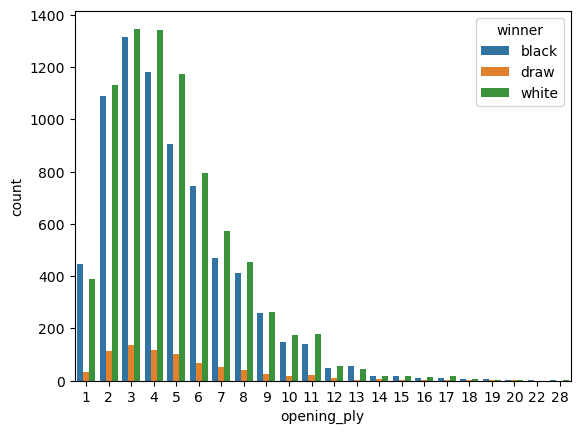

In [9]:
sns.countplot(data=train_set, x='opening_ply', hue='winner')
plt.show()

### 2. Preprocessing:
Ara un cop que ja hem observat les dades amb les que tenim que tractar começarem mirant Si tenim nans, analitzant si s'han de normalitzar atributs, i decidint amb quins atributs ens hauriem de quedar.

#### Detecció de Nans
Hem volgut assegurar-nos de si les nostres dades tenien o no Nans i tal i com haviem observat en la web del Kaggle no en tenim. Ho podem observar en la següent funcio de comprovacio de Nans, Cap columna te cap Nan.

In [10]:
nans = train_set.isna().sum()

print(nans)

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


#### Eliminar Duplicats
També ens hem donat compte que tenim files identiques repetides multiples vegades aixi que avanç de res el que farem es eliminar les repeticons asegurant-nos de eliminar nomes les que son 100% iguals.

In [ ]:
# Elimina files duplicades completament iguals

print(f"Train Abans de treure duplicats: {train_set.shape[0]} files")
print(f"Test Abans de treure duplicats: {X_test.shape[0]} files")

train_set = train_set.drop_duplicates()
X_test = X_test.drop_duplicates()

print()
print(f"Train Després de treure duplicats: {train_set.shape[0]} files")
print(f"Test Després de treure duplicats: {X_test.shape[0]} files")


Train Abans de treure duplicats: 4012 files
Test Abans de treure duplicats: 16046 files

Test Després de treure duplicats: 3991 files
Train Després de treure duplicats: 15761 files


#### Normalització de les dades

#### Eliminar Atributs

Hem de tenir en compte que tenim columnes com per exemple la id de la partida que no ens aporta cap dada rellevant ja que es unica per cada partida i no podriem obtenir informació d'ella.

Ara el farem es veure quines columnes són les que necesitem per poder predir el que volem saber que és qui guanyara segons els primers moviments.

In [8]:
dades_sense_columna = dades_sense_duplicats.drop(columns=["created_at","last_move_at"])
dades_sense_duplicats_sense_columna = dades_sense_columna.drop_duplicates()

#print(dades_sense_columna)
print(f"Despres de treure duplicats: {dades_sense_duplicats_sense_columna.shape[0]} files")



# Seleccionar totes les files amb id XXXX
id_seleccionat = "XRuQPSzH"
files_seleccionades = dades_sense_duplicats_sense_columna[dades_sense_duplicats_sense_columna["id"] == id_seleccionat]

print(files_seleccionades)

Despres de treure duplicats: 19113 files
           id  rated  turns victory_status winner increment_code     white_id  \
120  XRuQPSzH   True     50         resign  black           10+0  chess-brahs   

     white_rating black_id  black_rating  \
120          2036     cdvh          1706   

                                                 moves opening_eco  \
120  Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...         A08   

                               opening_name  opening_ply  
120  King's Indian Attack: French Variation            6  


### Metric selection:



### Model Selection amb Crossvalidation:



### Analisi final

